# WNB Submission for Chicago West Nile Kaggle Challenge.

#### DSI-5
##### Team WNB
##### Ira Rickman, Tina Schendt, Thomas Plapinger,  Michael Costa

## Import data and relevant libraries.

In [1]:
## Standard Libraries
import pandas as pd
pd.set_option('display.max_columns',22)
from geopy.geocoders import Nominatim
import numpy as np
from IPython.display import display
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns


## Modeling Libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import auc, roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

# eda function
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()


/Users/natalie/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/natalie/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df_weather = pd.read_csv('./assets/weather.csv')
df_train = pd.read_csv('./assets/train.csv')
df_test = pd.read_csv('./assets/test.csv')
df_spray = pd.read_csv('./assets/spray.csv')

## Conduct sufficent EDA to understand relationships in data and spot issues that need cleaning and prep.

### Start by looking at our train data

In [3]:
#Training data Column Na
# train.csv, test.csv - the training and test set of the main dataset. T
#The training set consists of data from 2007, 2009, 2011, and 2013, 
#while in the test set you are requested to predict the test results for 2008, 2010, 2012, 
#and 2014.
# Id: the id of the record
# Date: date that the WNV test is performed
# Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
# Species: the species of mosquitos
# Block: block number of address
# Street: street name
# Trap: Id of the trap
# AddressNumberAndStreet: approximate address returned from GeoCoder
# Latitude, Longitude: Latitude and Longitude returned from GeoCoder
# AddressAccuracy: accuracy returned from GeoCoder
# NumMosquitos: number of mosquitoes caught in this trap
# WnvPresent: whether West Nile Virus was present in these mosquitos. 
#1 means WNV is present, and 0 means not present. 


In [4]:
df_train.head(50)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [5]:
eda(df_train)
# check for missing values and duplicates. A single observation can only contain 50 mosquitos so duplicates
# not the same but the result of more than fifty in the trap

missing values 
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=10506, step=1)
dataframe types 
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object
dataframe shape 
(10506, 12)
dataframe describe 
              Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  1

In [6]:
print df_train.WnvPresent.value_counts() / len(df_train.WnvPresent)
# we see these classes will be very unbalanced.

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64


In [7]:
df_train['Date'] = pd.to_datetime(df_train.Date)

# convert Data

In [8]:
df_train.groupby(['Species', 'WnvPresent']).count()
# examine WN by species 

Date  Address  Block  Street  Trap  \
Species                WnvPresent                                       
CULEX ERRATICUS        0              1        1      1       1     1   
CULEX PIPIENS          0           2459     2459   2459    2459  2459   
                       1            240      240    240     240   240   
CULEX PIPIENS/RESTUANS 0           4490     4490   4490    4490  4490   
                       1            262      262    262     262   262   
CULEX RESTUANS         0           2691     2691   2691    2691  2691   
                       1             49       49     49      49    49   
CULEX SALINARIUS       0             86       86     86      86    86   
CULEX TARSALIS         0              6        6      6       6     6   
CULEX TERRITANS        0            222      222    222     222   222   

                                   AddressNumberAndStreet  Latitude  \
Species                WnvPresent                                     
CULEX ERRATICUS        0                                1         1   
CULEX PIPIENS          0                             2459      2459   
                       1                              240       240   
CULEX PIPIENS/RESTUANS 0                             4490      4490   
                       1                              262       262   
CULEX RESTUANS         0                             2691      2691   
                       1                               49        49   
CULEX SALINARIUS       0                               86        86   
CULEX TARSALIS         0                                6         6   
CULEX TERRITANS        0                              222       222   

                                   Longitude  AddressAccuracy  NumMosquitos  
Species                WnvPresent                                            
CULEX ERRATICUS        0                   1                1             1  
CULEX PIPIENS          0                2459             2459          2459  
                       1                 240              240           240  
CULEX PIPIENS/RESTUANS 0                4490             4490          4490  
                       1                 262              262           262  
CULEX RESTUANS         0                2691             2691          2691  
                       1                  49               49            49  
CULEX SALINARIUS       0                  86               86            86  
CULEX TARSALIS         0                   6                6             6  
CULEX TERRITANS        0                 222              222           222

## Look at weather data, prep it for tabluea an plot some relationships in seaborn as well as cleaning up the variables we want to use.

In [9]:
eda(df_weather)

missing values 
Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=2944, step=1)
dataframe types 
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object
data

In [10]:
df_weather.head(100)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,0444,1852,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,0443,1853,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [11]:
#Searched for interesting and relevant CodeSums to our project found none
df_weather['CodeSum'].value_counts()
#Convert Date Column to DateTime format
df_weather.Date = pd.to_datetime(df_weather.Date)

In [12]:
#Looking for Count on Ms in Depth and Water1 Features
print df_weather['Depth'].value_counts()
print df_weather['Water1'].value_counts()

M    1472
0    1472
Name: Depth, dtype: int64
M    2944
Name: Water1, dtype: int64


In [13]:
#Create DF with Features thought to be useful(others later readded and/or created)
weather2 = df_weather[['Station','Date', 'Tmax','Tmin','Tavg','DewPoint','WetBulb','Heat','Cool','CodeSum','PrecipTotal','StnPressure','SeaLevel','ResultSpeed','ResultDir','AvgSpeed'  ]]
weather2.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0,2,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,0,3,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,14,0,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,47,13,0,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,48,9,0,,0.00,29.39,30.12,11.7,7,11.9


In [14]:
#Show rows where M(NOAA's term for Missing Data)
M_Value = weather2[weather2.isin(["M"]).any(axis=1)]
print M_Value

#Replace M with NaN
weather3 = weather2.replace('M',np.nan)
print weather3

#Subsequently Drop NaN rows
weather4= weather3.dropna()
print weather4

      Station       Date  Tmax  Tmin Tavg  DewPoint WetBulb Heat Cool  \
7           2 2007-05-04    78    51    M        42      50    M    M   
87          2 2007-06-13    86    68   77        53      62    0   12   
117         2 2007-06-28    73    61   67        56      61    0    2   
119         2 2007-06-29    71    56   64        56      60    1    0   
505         2 2008-07-08    86    46    M        68      71    M    M   
675         2 2008-10-01    62    46    M        41      47    M    M   
832         1 2009-06-18    80    61   71        63      67    0    6   
848         1 2009-06-26    86    69   78        60       M    0   13   
994         1 2009-09-07    77    59   68        59      62    0    3   
1637        2 2011-07-22   100    71    M        70      74    M    M   
1732        1 2011-09-08    75    57   66        53      59    0    1   
1745        2 2011-09-14    60    48   54        45      51   11    0   
1756        1 2011-09-20    74    49   62        54

      Station       Date  Tmax  Tmin Tavg  DewPoint WetBulb Heat Cool  \
0           1 2007-05-01    83    50   67        51      56    0    2   
1           2 2007-05-01    84    52   68        51      57    0    3   
2           1 2007-05-02    59    42   51        42      47   14    0   
3           2 2007-05-02    60    43   52        42      47   13    0   
4           1 2007-05-03    66    46   56        40      48    9    0   
5           2 2007-05-03    67    48   58        40      50    7    0   
6           1 2007-05-04    66    49   58        41      50    7    0   
8           1 2007-05-05    66    53   60        38      49    5    0   
9           2 2007-05-05    66    54   60        39      50    5    0   
10          1 2007-05-06    68    49   59        30      46    6    0   
11          2 2007-05-06    68    52   60        30      46    5    0   
12          1 2007-05-07    83    47   65        41      54    0    0   
13          2 2007-05-07    84    50   67        39

In [15]:
#Create Year Column
weather4['Year'] = weather4.Date.dt.year

#Create Month Column
weather4['Month'] = weather4.Date.dt.month

#Replace "  T" with 0.00 as T stands for Trace which NOAA defines as 
#precipation existing, but with not measureable accumulation aka 0
weather4.PrecipTotal.replace('  T',"0.00", inplace=True)

/Users/natalie/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/natalie/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/natalie/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
#Changing Column types
weather4.Tmin = weather4.Tmin.astype('float64')
weather4.Tmax = weather4.Tmax.astype('float64')
weather4.Tavg = weather4.Tavg.astype('float64')
weather4.AvgSpeed = weather4.AvgSpeed.astype('float64')
weather4.DewPoint = weather4.DewPoint.astype('float64')
weather4.WetBulb = weather4.WetBulb.astype('float64')
weather4.PrecipTotal = weather4.PrecipTotal.astype('float64')
weather4.head()

/Users/natalie/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month
0,1,2007-05-01,83.0,50.0,67.0,51.0,56.0,0,2,,0.0,29.10,29.82,1.7,27,9.2,2007,5
1,2,2007-05-01,84.0,52.0,68.0,51.0,57.0,0,3,,0.0,29.18,29.82,2.7,25,9.6,2007,5
2,1,2007-05-02,59.0,42.0,51.0,42.0,47.0,14,0,BR,0.0,29.38,30.09,13.0,4,13.4,2007,5
3,2,2007-05-02,60.0,43.0,52.0,42.0,47.0,13,0,BR HZ,0.0,29.44,30.08,13.3,2,13.4,2007,5
4,1,2007-05-03,66.0,46.0,56.0,40.0,48.0,9,0,,0.0,29.39,30.12,11.7,7,11.9,2007,5


/Users/natalie/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


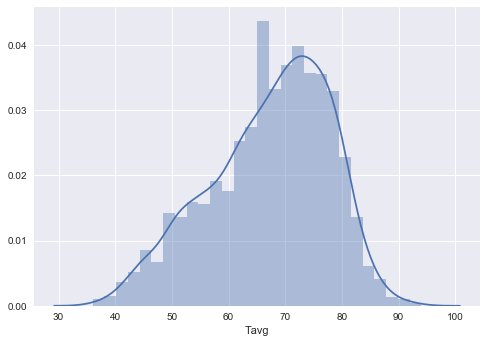

In [17]:
#Tavg Density Plot
sns.distplot(weather4.Tavg)
plt.show()

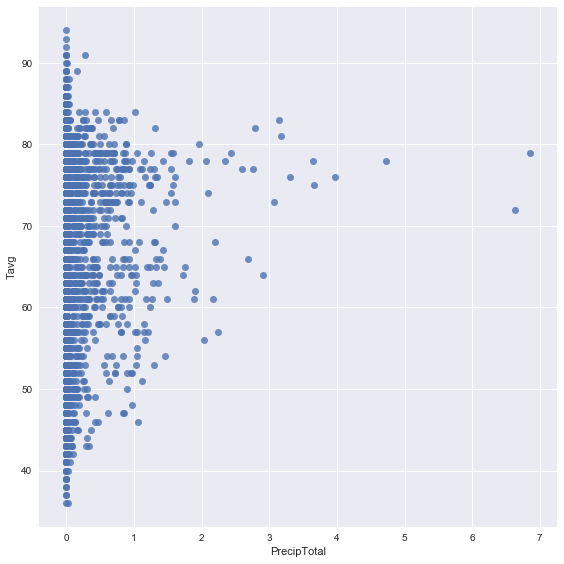

In [18]:
#Scatter Plot of PrecipTotal vs Tavg
sns.lmplot('PrecipTotal','Tavg', data=weather4, fit_reg=False, size=8)
sns.plt.show()

/Users/natalie/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/natalie/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


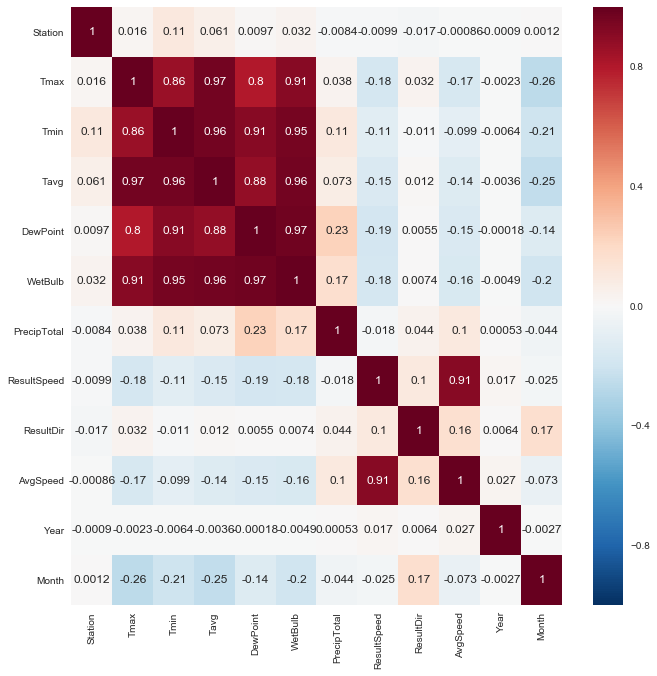

In [19]:
#Heatmap to see correlation of different weather variables.
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(weather4.corr(),annot=True)
plt.show()

In [20]:
#Drop Codesum Column
weather5 = weather4.drop('CodeSum', axis=1)

## lets check out spray

In [21]:
eda(df_spray)

missing values 
Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=14835, step=1)
dataframe types 
Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object
dataframe shape 
(14835, 4)
dataframe describe 
           Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727
Date
10
Time
8583
Latitude
12887
Longitude
13007


In [22]:
df_spray.head()
# this frame will be helpful in calculating the CBA

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


## Prep data and feature engineering.

### First we will work on our aggregated weather features we will be using for 7days, 14days, and 30days

In [23]:
weather_data = df_weather
## fixing formatting
weather_data['avg_temp'] = weather_data.Tavg.replace('M',np.nan)
weather_data['rainfall']=weather_data.PrecipTotal.replace(['  T','M'],'0.00')
weather_data['windspeed']=weather_data.AvgSpeed.replace('M', np.nan)
weather_data['departure']=weather_data.Depart.replace('M', np.nan)
weather_data['rise'] = weather_data.Sunrise.replace('-', np.nan)
weather_data['set'] = weather_data.Sunset.replace('-', np.nan)
weather_data['wetbulb'] = weather_data.WetBulb.replace('M',np.nan)
weather_data['dewpoint'] = weather_data.DewPoint

In [24]:
# getting the sunrise and sunset hour and minutes
weather_data['rise_hr'], weather_data['rise_min']= weather_data.rise.str[:2],weather_data.rise.str[2:]
weather_data['set_hr'], weather_data['set_min']= weather_data.set.str[:2],weather_data.set.str[2:]

In [25]:
# getting the daylight hours
weather_data['hr_diff']=weather_data.set_hr.astype(float) - weather_data.rise_hr.astype(float)
weather_data['min_diff']=weather_data.set_min.astype(float) - weather_data.rise_min.astype(float)
weather_data['daylight_mins'] = weather_data.hr_diff*60 + weather_data.min_diff

In [26]:
# converting types
weather_data.dropna(inplace=True)
weather_data.avg_temp = pd.to_numeric(weather_data.avg_temp)
weather_data.rainfall = pd.to_numeric(weather_data.rainfall)
weather_data.windspeed = pd.to_numeric(weather_data.windspeed)
weather_data.departure = pd.to_numeric(weather_data.departure)
weather_data.dewpoint = pd.to_numeric(weather_data.dewpoint)
weather_data.wetbulb = pd.to_numeric(weather_data.wetbulb)

weather_data.dtypes

Station                   int64
Date             datetime64[ns]
Tmax                      int64
Tmin                      int64
Tavg                     object
Depart                   object
DewPoint                  int64
WetBulb                  object
Heat                     object
Cool                     object
Sunrise                  object
Sunset                   object
CodeSum                  object
Depth                    object
Water1                   object
SnowFall                 object
PrecipTotal              object
StnPressure              object
SeaLevel                 object
ResultSpeed             float64
ResultDir                 int64
AvgSpeed                 object
avg_temp                  int64
rainfall                float64
windspeed               float64
departure                 int64
rise                     object
set                      object
wetbulb                   int64
dewpoint                  int64
rise_hr                  object
rise_min

In [27]:
# prepping weather by date
all_weather = weather_data.groupby('Date').agg({'avg_temp':'mean', 'windspeed':'mean',
                                                'daylight_mins':'mean','departure':'mean', 
                                                'wetbulb':'mean', 'dewpoint':'mean', 'rainfall':'mean'})

In [28]:
# generating last 7, 14, 30 days
for var in ['avg_temp', 'rainfall', 'windspeed', 'daylight_mins','departure','wetbulb','dewpoint']:
    for i in range(1,31):
        all_weather[var + str(i) + "Days Before"] = all_weather[var].shift(i)

In [29]:
# seeing the list of columns to make things easier :)
[[index,col] for index, col in enumerate(all_weather.columns)]

[[0, 'rainfall'],
 [1, 'wetbulb'],
 [2, 'dewpoint'],
 [3, 'departure'],
 [4, 'windspeed'],
 [5, 'avg_temp'],
 [6, 'daylight_mins'],
 [7, 'avg_temp1Days Before'],
 [8, 'avg_temp2Days Before'],
 [9, 'avg_temp3Days Before'],
 [10, 'avg_temp4Days Before'],
 [11, 'avg_temp5Days Before'],
 [12, 'avg_temp6Days Before'],
 [13, 'avg_temp7Days Before'],
 [14, 'avg_temp8Days Before'],
 [15, 'avg_temp9Days Before'],
 [16, 'avg_temp10Days Before'],
 [17, 'avg_temp11Days Before'],
 [18, 'avg_temp12Days Before'],
 [19, 'avg_temp13Days Before'],
 [20, 'avg_temp14Days Before'],
 [21, 'avg_temp15Days Before'],
 [22, 'avg_temp16Days Before'],
 [23, 'avg_temp17Days Before'],
 [24, 'avg_temp18Days Before'],
 [25, 'avg_temp19Days Before'],
 [26, 'avg_temp20Days Before'],
 [27, 'avg_temp21Days Before'],
 [28, 'avg_temp22Days Before'],
 [29, 'avg_temp23Days Before'],
 [30, 'avg_temp24Days Before'],
 [31, 'avg_temp25Days Before'],
 [32, 'avg_temp26Days Before'],
 [33, 'avg_temp27Days Before'],
 [34, 'avg_temp2

In [30]:
## generating the averages for 7,14, 30 days
all_weather['Last7Average_Temp'] = all_weather[all_weather.columns[7:14]].mean(axis=1)
all_weather['Last14Average_Temp'] = all_weather[all_weather.columns[14:21]].mean(axis=1)
all_weather['MonthAverage_Temp'] = all_weather[all_weather.columns[21:35]].mean(axis=1)

all_weather['Last7Total_Rainfall'] = all_weather[all_weather.columns[35:42]].sum(axis=1)
all_weather['Last14Total_Rainfall'] = all_weather[all_weather.columns[42:49]].sum(axis=1)
all_weather['MonthTotal_Rainfall'] = all_weather[all_weather.columns[49:63]].sum(axis=1)

all_weather['Last7Average_Windspeed'] = all_weather[all_weather.columns[63:70]].mean(axis=1)
all_weather['Last14Average_Windspeed'] = all_weather[all_weather.columns[70:77]].mean(axis=1)
all_weather['MonthAverage_Windspeed'] = all_weather[all_weather.columns[77:91]].mean(axis=1)

all_weather['Last7Average_Daylight'] = all_weather[all_weather.columns[91:98]].mean(axis=1)
all_weather['Last14Average_Daylight'] = all_weather[all_weather.columns[98:105]].mean(axis=1)
all_weather['MonthAverage_Daylight'] = all_weather[all_weather.columns[105:119]].mean(axis=1)

all_weather['Last7Average_Departure'] = all_weather[all_weather.columns[119:126]].mean(axis=1)
all_weather['Last14Average_Departure'] = all_weather[all_weather.columns[126:133]].mean(axis=1)
all_weather['MonthAverage_Departure'] = all_weather[all_weather.columns[133:147]].mean(axis=1)

all_weather['Last7Average_WetBulb'] = all_weather[all_weather.columns[147:154]].mean(axis=1)
all_weather['Last14Average_WetBulb'] = all_weather[all_weather.columns[154:161]].mean(axis=1)
all_weather['MonthAverage_WetBulb'] = all_weather[all_weather.columns[161:175]].mean(axis=1)

all_weather['Last7Average_DewPoint'] = all_weather[all_weather.columns[175:182]].mean(axis=1)
all_weather['Last14Average_DewPoint'] = all_weather[all_weather.columns[182:189]].mean(axis=1)
all_weather['MonthAverage_DewPoint'] = all_weather[all_weather.columns[189:203]].mean(axis=1)

In [31]:
all_weather2 = all_weather.iloc[:,217:]
all_weather2.to_csv('All_Weather2.csv')


In [32]:
All_Weather2 = pd.read_csv('All_Weather2.csv')
# Merge weather features with train and test data the read to csv
merged_test = df_test.merge(All_Weather2, on='Date')
merged_train = df_train.merge(All_Weather2, on='Date')

# save to csv
# merged_train.to_csv('merged_train.csv', index = False)

# merged_test.to_csv('merged_test.csv', index = False)


In [36]:
merged_train


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Last14Average_Daylight,MonthAverage_Daylight,Last7Average_Departure,Last14Average_Departure,MonthAverage_Departure,Last7Average_WetBulb,Last14Average_WetBulb,MonthAverage_WetBulb,Last7Average_DewPoint,Last14Average_DewPoint,MonthAverage_DewPoint


### Create over 50 in trap feature

In [37]:
train_csv = 'assets/train.csv'
test_csv = 'assets/test.csv'
train = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [38]:
from datetime import timedelta #importing timedelta
observed=train.groupby(['Trap','Date']).agg({'Date':'count'}) # making the df by trap and date
observed.rename(columns={'Date':'Records'}, inplace=True) # renaming column
observed.reset_index(level=1, inplace=True) # making the date index a column
observed.Date=pd.to_datetime(observed.Date,infer_datetime_format=True) # converting to time so I can do timedelta

# starting the loop through each trap id
for trap in observed.index.unique():
    # making an empty data frame to store each trap since I'm making a new df for each trap
    df1 = pd.DataFrame(columns=['Date', 'Records', 'More'])
    
    # storing each trap in a data frame
    df = observed.loc[[trap]]
    
    # adding the more column
    df['More']=''
    
    #starting a loop from the end of the dataframe to the start
    for i in reversed(range(len(df))):
        #making sure we aren't looking at the first row (since we can't index from there)
        if i!=0:
            # making sure we loop through every preceding row
            for j in range(1,10):
                # and making sure we don't index negatively out of the index
                if i>j:
                    # comparing the j previous date to the current date to see if it's within the last 7 days
                    if df.iloc[i,0]-df.iloc[i-j,0]<=timedelta(days=7):
                        # if it is and the number of rows for that date is greater than one, make More 1
                        if df.iloc[i-j,1]>1:
                            df.iloc[i,2]=1
                    else:
                        # since we found a date outside of the last 7 days, we can move to the next row
                        break
    #appending what we found to the end of the df
    df1=df1.append(df)
    print df

/Users/natalie/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/natalie/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


           Date  Records More
Trap                         
T001 2007-06-26        1     
T001 2007-07-11        1     
T001 2007-07-18        1     
T001 2007-08-01        3     
T001 2007-08-07        2    1
T001 2007-08-15        2     
T001 2007-08-21        1    1
T001 2007-08-24        1     
T001 2007-09-12        1     
T001 2007-10-04        2     
           Date  Records More
Trap                         
T002 2007-05-29        2     
T002 2007-06-05        3     
T002 2007-06-26        3     
T002 2007-06-29        1    1
T002 2007-07-02        2    1
T002 2007-07-11        3     
T002 2007-07-18        3    1
T002 2007-07-27        3     
T002 2007-08-01        6    1
T002 2007-08-07        3    1
T002 2007-08-15        4     
T002 2007-08-21        3    1
T002 2007-08-24        2    1
T002 2007-09-04        2     
T002 2007-09-12        2     
T002 2007-09-18        2    1
T002 2007-09-24        2    1
T002 2007-10-04        3     
T002 2009-05-28        1     
T002 2009-

           Date  Records More
Trap                         
T011 2007-06-05        1     
T011 2007-06-26        2     
T011 2007-07-02        1    1
T011 2007-07-11        4     
T011 2007-07-18        2    1
T011 2007-07-27        2     
T011 2007-08-01        5    1
T011 2007-08-07        3    1
T011 2007-08-15        2     
T011 2007-08-21        2    1
T011 2007-08-24        2    1
T011 2007-09-04        2     
T011 2007-09-12        2     
T011 2007-09-18        2    1
T011 2007-09-24        1    1
T011 2007-10-04        2     
T011 2009-05-28        1     
T011 2009-06-02        1     
T011 2009-06-05        2     
T011 2009-06-12        2    1
T011 2009-06-19        2    1
T011 2009-06-26        2    1
T011 2009-07-06        2     
T011 2009-07-10        2    1
T011 2009-07-17        2    1
T011 2009-07-24        3    1
T011 2009-07-31        3    1
T011 2009-08-07        2    1
T011 2009-08-13        1    1
T011 2009-08-25        4     
...         ...      ...  ...
T011 2011-

           Date  Records More
Trap                         
T018 2007-06-29        1     
T018 2007-07-02        1     
T018 2007-07-27        1     
T018 2007-08-01        1     
T018 2007-08-07        1     
T018 2007-08-15        2     
T018 2007-08-21        2    1
T018 2007-08-24        1    1
T018 2007-09-04        2     
T018 2007-09-12        1     
T018 2007-09-18        2     
T018 2009-06-02        2     
T018 2009-06-05        1    1
T018 2009-06-12        2     
T018 2009-06-19        1    1
T018 2009-06-26        1     
T018 2009-07-10        2     
T018 2009-07-17        1    1
T018 2009-10-01        2     
T018 2011-06-10        3     
T018 2011-07-11        1     
T018 2011-07-15        1     
T018 2011-07-25        2     
T018 2011-07-29        1    1
T018 2011-08-12        1     
T018 2011-08-26        2     
T018 2011-09-12        2     
T018 2011-09-30        1     
T018 2013-06-07        2     
T018 2013-06-14        2    1
T018 2013-06-21        2    1
T018 2013-

           Date  Records More
Trap                         
T033 2007-06-05        1     
T033 2007-06-26        2     
T033 2007-07-11        1     
T033 2007-07-18        1     
T033 2007-08-01        4     
T033 2007-08-07        2    1
T033 2007-08-15        3     
T033 2007-08-21        2    1
T033 2007-08-24        2    1
T033 2007-09-04        2     
T033 2007-09-12        1     
T033 2007-09-18        2     
T033 2007-09-24        2    1
T033 2007-10-04        2     
T033 2009-06-02        1     
T033 2009-06-05        2     
T033 2009-06-12        1    1
T033 2009-06-19        1     
T033 2009-06-26        1     
T033 2009-07-10        2     
T033 2009-07-24        2     
T033 2009-07-31        1    1
T033 2009-08-07        3     
T033 2009-08-25        1     
T033 2009-08-27        1     
T033 2009-09-14        2     
T033 2009-09-17        2    1
T033 2009-09-25        2     
T033 2011-06-24        2     
T033 2011-06-30        1    1
T033 2011-07-11        2     
T033 2011-

           Date  Records More
Trap                         
T047 2007-06-26        2     
T047 2007-07-02        2     
T047 2007-07-11        2     
T047 2007-07-18        1    1
T047 2007-07-19        1     
T047 2007-07-27        1     
T047 2007-08-01        4     
T047 2007-08-15        2     
T047 2007-08-21        2    1
T047 2007-08-24        2    1
T047 2007-09-04        1     
T047 2007-09-18        2     
T047 2007-09-24        1    1
T047 2007-10-04        2     
T047 2009-06-05        2     
T047 2009-06-12        1    1
T047 2009-06-19        2     
T047 2009-06-26        3    1
T047 2009-07-06        2     
T047 2009-07-10        1    1
T047 2009-07-13        2    1
T047 2009-07-17        3    1
T047 2009-07-24        2    1
T047 2009-07-31        2    1
T047 2009-08-07        1    1
T047 2009-09-03        1     
T047 2009-09-17        2     
T047 2009-09-25        3     
T047 2011-06-10        3     
T047 2011-06-17        2    1
T047 2011-06-24        2    1
T047 2011-

           Date  Records More
Trap                         
T060 2007-07-11        2     
T060 2007-07-18        1     
T060 2007-08-01        2     
T060 2007-08-07        1    1
T060 2007-08-15        1     
T060 2007-08-21        2     
T060 2007-09-04        1     
T060 2007-09-12        1     
T060 2007-09-18        2     
T060 2007-09-24        1    1
T060 2007-10-04        1     
           Date  Records More
Trap                         
T061 2007-07-11        2     
T061 2007-07-18        1     
T061 2007-07-19        1     
T061 2007-07-27        2     
T061 2007-08-01        4    1
T061 2007-08-07        2    1
T061 2007-08-15        2     
T061 2007-08-21        4    1
T061 2007-08-24        2    1
T061 2007-09-04        4     
T061 2007-09-12        3     
T061 2007-09-18        1    1
T061 2007-09-24        3     
T061 2007-10-04        2     
T061 2009-06-02        1     
T061 2009-06-12        2     
T061 2009-06-19        1    1
T061 2009-06-26        1     
T061 2009-

           Date  Records More
Trap                         
T067 2007-07-11        1     
T067 2007-07-27        2     
T067 2007-08-01        9    1
T067 2007-08-07        2    1
T067 2007-08-15        2     
T067 2007-08-21        2    1
T067 2007-08-24        2    1
T067 2007-09-04        2     
T067 2007-09-12        2     
T067 2007-09-19        3    1
T067 2007-09-24        1    1
T067 2007-10-04        2     
           Date  Records More
Trap                         
T069 2007-07-11        3     
T069 2007-08-01        8     
T069 2007-08-07        1    1
T069 2007-08-15        2     
T069 2007-08-21        2    1
T069 2007-08-24        2    1
T069 2007-09-04        2     
T069 2007-09-12        3     
T069 2007-10-04        2     
T069 2009-06-02        1     
T069 2009-06-05        1     
T069 2009-06-12        2     
T069 2009-06-19        2    1
T069 2009-06-26        1    1
T069 2009-07-06        1     
T069 2009-07-10        2     
T069 2009-07-17        2    1
T069 2009-

           Date  Records More
Trap                         
T079 2007-07-11        2     
T079 2007-08-01        9     
T079 2007-08-07        3    1
T079 2007-08-15        3     
T079 2007-08-21        3    1
T079 2007-08-24        2    1
T079 2007-09-05        3     
T079 2007-09-12        1    1
T079 2007-09-19        3     
T079 2007-09-24        2    1
T079 2007-10-04        3     
T079 2009-05-28        1     
T079 2009-06-19        1     
T079 2009-07-06        1     
T079 2009-07-10        1     
T079 2009-07-17        1     
T079 2009-08-27        2     
T079 2009-09-03        2    1
T079 2009-09-14        1     
T079 2009-09-17        1     
T079 2011-06-17        1     
T079 2011-06-30        2     
T079 2011-07-15        3     
T079 2011-07-25        2     
T079 2011-07-29        1    1
T079 2011-08-05        1     
T079 2011-08-12        1     
T079 2011-08-19        1     
T079 2011-08-26        1     
T079 2011-09-12        1     
T079 2011-09-16        1     
T079 2011-

T085 2007-10-04        2     
           Date  Records More
Trap                         
T086 2007-05-29        2     
T086 2007-06-05        1     
T086 2007-06-26        3     
T086 2007-06-29        2    1
T086 2007-07-02        2    1
T086 2007-07-11        9     
T086 2007-07-18        2    1
T086 2007-08-01       19     
T086 2007-08-02        3    1
T086 2007-08-07        5    1
T086 2007-08-15       12     
T086 2007-08-21        4    1
T086 2007-08-22        1    1
T086 2007-08-24        5    1
T086 2007-09-05        3     
T086 2007-09-12        2    1
T086 2007-09-19        3    1
T086 2007-09-24        4    1
T086 2007-10-04        4     
           Date  Records More
Trap                         
T088 2007-06-26        1     
T088 2007-07-02        1     
T088 2007-07-11        2     
T088 2007-08-01        5     
T088 2007-08-02        3    1
T088 2007-08-07        1    1
T088 2007-08-15        3     
T088 2007-08-21        2    1
T088 2007-08-24        2    1
T088 2007-

           Date  Records More
Trap                         
T096 2007-05-29        2     
T096 2007-06-05        3     
T096 2007-06-26        1     
T096 2007-06-29        1     
T096 2007-07-02        3     
T096 2007-07-11        3     
T096 2007-08-01        6     
T096 2007-08-02        6    1
T096 2007-08-07        4    1
T096 2007-08-15        3     
T096 2007-08-22        3    1
T096 2007-08-24        4    1
T096 2007-09-05        2     
T096 2007-09-12        2    1
T096 2007-09-19        2    1
T096 2007-09-24        3    1
T096 2007-10-04        2     
           Date  Records More
Trap                         
T097 2007-08-01        2     
T097 2007-08-02        3     
T097 2007-08-07        2    1
T097 2007-08-15        2     
T097 2007-08-22        2    1
T097 2007-08-24        2    1
T097 2007-09-05        1     
T097 2007-09-12        1     
T097 2007-10-04        2     
           Date  Records More
Trap                         
T099 2007-08-01        4     
T099 2007-

           Date  Records More
Trap                         
T128 2007-07-25        6     
T128 2007-08-01        5     
T128 2007-08-02        2    1
T128 2007-08-08       10    1
T128 2007-08-16       19     
T128 2007-08-22        8    1
T128 2007-08-28        9    1
T128 2007-09-06        3     
T128 2007-09-12        2    1
T128 2007-09-19        2    1
T128 2007-10-09        2     
T128 2009-06-02        1     
T128 2009-06-19        1     
T128 2009-06-26        2     
T128 2009-07-06        3     
T128 2009-07-17        2     
T128 2009-07-27        1     
T128 2009-07-31        1     
T128 2009-08-07        2     
T128 2009-08-13        2    1
T128 2009-08-25        1     
T128 2009-09-14        2     
T128 2009-09-17        2    1
T128 2009-09-25        1     
T128 2009-10-01        3     
T128 2011-06-17        2     
T128 2011-06-24        2    1
T128 2011-06-30        2    1
T128 2011-07-11        2     
T128 2011-07-15        2    1
T128 2011-07-25        4     
T128 2011-

           Date  Records More
Trap                         
T145 2007-06-05        1     
T145 2007-06-26        1     
T145 2007-06-29        1     
T145 2007-07-02        1     
T145 2007-07-11        2     
T145 2007-07-19        1     
T145 2007-07-27        2     
T145 2007-08-01       10    1
T145 2007-08-07        4    1
T145 2007-08-15        2     
T145 2007-08-21        4    1
T145 2007-08-24        4    1
T145 2007-09-18        2     
T145 2007-09-19        1    1
T145 2007-09-24        2    1
T145 2007-10-04        1     
T145 2009-06-19        1     
T145 2009-06-26        2     
T145 2009-07-06        1     
T145 2009-07-17        1     
T145 2009-07-24        1     
T145 2009-09-03        2     
T145 2009-09-17        1     
T145 2011-06-17        1     
T145 2011-06-24        2     
T145 2011-06-30        1    1
T145 2011-07-11        2     
T145 2011-07-15        1    1
T145 2011-07-25        2     
T145 2011-07-29        1    1
T145 2011-08-05        2     
T145 2011-

T153 2009-09-25        1     
           Date  Records More
Trap                         
T154 2007-06-05        1     
T154 2007-07-02        1     
T154 2007-08-01        3     
T154 2007-08-07        3    1
T154 2007-08-15        3     
T154 2007-08-21        2    1
T154 2007-08-24        1    1
T154 2007-09-12        1     
T154 2007-09-18        2     
T154 2007-09-24        2    1
T154 2007-10-04        2     
           Date  Records More
Trap                         
T155 2007-07-11        1     
T155 2007-07-27        1     
T155 2007-08-01        7     
T155 2007-08-07        2    1
T155 2007-08-15        2     
T155 2007-08-21        2    1
T155 2007-08-24        3    1
T155 2007-09-05        2     
T155 2007-09-12        2    1
T155 2007-09-19        3    1
T155 2007-10-04        2     
T155 2009-05-28        1     
T155 2009-06-02        1     
T155 2009-06-05        2     
T155 2009-06-26        1     
T155 2009-07-06        1     
T155 2009-07-17        2     
T155 2009-

           Date  Records More
Trap                         
T200 2007-07-18        6     
T200 2007-07-19        5     
T200 2007-08-02        6     
T200 2007-08-09        9    1
T200 2007-08-17        6     
T200 2007-08-22        4    1
T200 2007-08-28        6    1
T200 2007-09-06        5     
T200 2007-09-12        2    1
T200 2007-09-19        2    1
T200 2007-09-25        5    1
T200 2007-10-09        4     
T200 2009-05-28        1     
T200 2009-06-15        2     
T200 2009-06-19        2    1
T200 2009-07-06        1     
T200 2009-07-13        4     
T200 2009-07-17        1    1
T200 2009-07-27        3     
T200 2009-07-31        3    1
T200 2009-08-07        2    1
T200 2009-08-13        3    1
T200 2009-08-25        3     
T200 2009-08-27        2    1
T200 2009-09-03        3    1
T200 2009-09-14        3     
T200 2009-09-17        3    1
T200 2009-09-25        3     
T200 2009-10-01        4    1
T200 2011-06-17        2     
T200 2011-06-24        2    1
T200 2011-

           Date  Records More
Trap                         
T221 2007-08-17       11     
T221 2007-08-22        2     
T221 2007-08-28        2    1
T221 2007-09-06        2     
T221 2007-09-12        2    1
T221 2007-09-19        1    1
T221 2007-09-25        2     
T221 2007-10-09        2     
T221 2009-05-28        2     
T221 2009-06-02        1    1
T221 2009-06-29        1     
T221 2009-07-13        3     
T221 2009-07-17        4    1
T221 2009-07-27        3     
T221 2009-07-31        1    1
T221 2009-08-07        2     
T221 2009-08-13        1    1
T221 2009-08-25        2     
T221 2009-08-27        2    1
T221 2009-09-03        2    1
T221 2009-09-14        1     
T221 2009-09-17        1     
T221 2009-09-25        2     
T221 2011-06-17        2     
T221 2011-06-24        1    1
T221 2011-06-30        1     
T221 2011-07-11        2     
T221 2011-07-15        1    1
T221 2011-07-29        2     
T221 2011-08-05        3    1
T221 2011-08-12        1    1
T221 2011-

           Date  Records More
Trap                         
T230 2009-08-07        1     
T230 2009-08-13        2     
T230 2009-08-25        1     
T230 2009-08-27        1     
T230 2009-09-14        1     
T230 2009-09-17        2     
T230 2009-09-25        1     
T230 2009-10-01        1     
T230 2011-06-10        1     
T230 2011-06-17        2     
T230 2011-06-24        1    1
T230 2011-06-30        1     
T230 2011-07-11        2     
T230 2011-07-15        1    1
T230 2011-07-25        2     
T230 2011-07-29        3    1
T230 2011-08-05        1    1
T230 2011-08-12        2     
T230 2011-08-19        2    1
T230 2011-08-26        1    1
T230 2011-09-01        1     
T230 2011-09-12        2     
T230 2011-09-16        1    1
T230 2011-09-23        1     
T230 2013-06-07        2     
T230 2013-06-14        2    1
T230 2013-06-21        1    1
T230 2013-06-27        2     
T230 2013-07-08        1     
T230 2013-07-12        2     
T230 2013-07-19        2    1
T230 2013-

In [ ]:
df1_['More'] = df1_['More'].fillna(value=0)

In [ ]:
df1.to_csv('prior_multiple_obs.csv')

In [ ]:
from datetime import timedelta #importing timedelta
observed=test_df.groupby(['Trap','Date']).agg({'Date':'count'}) # making the df by trap and date
observed.rename(columns={'Date':'Records'}, inplace=True) # renaming column
observed.reset_index(level=1, inplace=True) # making the date index a column
observed.Date=pd.to_datetime(observed.Date,infer_datetime_format=True) # converting to time so I can do timedelta

# starting the loop through each trap id
for trap in observed.index.unique():
    # making an empty data frame to store each trap since I'm making a new df for each trap
    df2 = pd.DataFrame(columns=['Date', 'Records', 'More'])
    
    # storing each trap in a data frame
    df = observed.loc[[trap]]
    
    # adding the more column
    df['More']=''
    
    #starting a loop from the end of the dataframe to the start
    for i in reversed(range(len(df))):
        #making sure we aren't looking at the first row (since we can't index from there)
        if i!=0:
            # making sure we loop through every preceding row
            for j in range(1,10):
                # and making sure we don't index negatively out of the index
                if i>j:
                    # comparing the j previous date to the current date to see if it's within the last 7 days
                    if df.iloc[i,0]-df.iloc[i-j,0]<=timedelta(days=7):
                        # if it is and the number of rows for that date is greater than one, make More 1
                        if df.iloc[i-j,1]>1:
                            df.iloc[i,2]=1
                    else:
                        # since we found a date outside of the last 7 days, we can move to the next row
                        break
    #appending what we found to the end of the df
    df2=df2.append(df)
    print df

In [ ]:
df2['More'] = df2['More'].fillna(value=0)

In [ ]:
df2.to_csv('testprior_multiple_obs.csv')

## Get df's ready for modeling. 

In [ ]:
train_df = pd.read_csv('./merged_train.csv')
test_df = pd.read_csv('./merged_test.csv')
train_trap = pd.read_csv('./assets/train.csv')
test_trap = pd.read_csv('./assets/test.csv')
train_50sqito = pd.read_csv('./prior_multiple_obs.csv')
test_50sqito = pd.read_csv('./testprior_multiple_obs.csv')

In [ ]:
train_50sqito['Trap'] = train_50sqito['Unnamed: 0']
test_50sqito['Trap'] = test_50sqito['Unnamed: 0']

In [ ]:
train_50sqito = train_50sqito.drop('Unnamed: 0', 1)
test_50sqito = test_50sqito.drop('Unnamed: 0', 1)

In [40]:
# Here we are factorizing our species and traps
species_map = {'CULEX RESTUANS' : "1",
              'CULEX TERRITANS' : "2", 
              'CULEX PIPIENS'   : "3", 
              'CULEX PIPIENS/RESTUANS' : "4", 
              'CULEX ERRATICUS' : "5", 
              'CULEX SALINARIUS': "6", 
              'CULEX TARSALIS' :  "7",
              'UNSPECIFIED CULEX': "4"}

In [ ]:
train_df['Species_fac'] = [species_map.get(x) for x in train_df["Species"]]
test_df['Species_fac'] = [species_map.get(x) for x in test_df["Species"]]

In [ ]:
train_df['Trap'] = train_trap[['Trap']]
test_df['Trap'] = test_trap[['Trap']]

In [ ]:
train_df = train_df.merge(train_50sqito, how='left', left_on=['Date','Trap'], right_on=['Date','Trap'])

In [ ]:
test_df = test_df.merge(test_50sqito, how='left', left_on=['Date','Trap'], right_on=['Date','Trap'])

In [ ]:
trap_dict = {}
for i, trap in enumerate(test_df.Trap.unique()):
    trap_dict[trap] = i
trap_dict

In [ ]:
train_df['Trap_fac'] = [trap_dict.get(x) for x in train_df["Trap"]]
test_df['Trap_fac'] = [trap_dict.get(x) for x in test_df["Trap"]]

In [ ]:
test_df = test_df[['Id', 'Latitude', 'Longitude',
       'Last7Average_Temp', 'Last14Average_Temp',
       'MonthAverage_Temp', 'Last7Total_Rainfall', 'Last14Total_Rainfall',
       'MonthTotal_Rainfall', 'Last7Average_Windspeed',
       'Last14Average_Windspeed', 'MonthAverage_Windspeed',
       'Last7Average_Daylight', 'Last14Average_Daylight',
       'MonthAverage_Daylight', 'Last7Average_Departure',
       'Last14Average_Departure', 'MonthAverage_Departure',
       'Last7Average_WetBulb', 'Last14Average_WetBulb',
       'MonthAverage_WetBulb', 'Last7Average_DewPoint',
       'Last14Average_DewPoint', 'MonthAverage_DewPoint', 'Species_fac',
       'Trap_fac', 'More']]

In [43]:
train_df = train_df[['WnvPresent', 'Latitude', 'Longitude',
       'Last7Average_Temp', 'Last14Average_Temp',
       'MonthAverage_Temp', 'Last7Total_Rainfall', 'Last14Total_Rainfall',
       'MonthTotal_Rainfall', 'Last7Average_Windspeed',
       'Last14Average_Windspeed', 'MonthAverage_Windspeed',
       'Last7Average_Daylight', 'Last14Average_Daylight',
       'MonthAverage_Daylight', 'Last7Average_Departure',
       'Last14Average_Departure', 'MonthAverage_Departure',
       'Last7Average_WetBulb', 'Last14Average_WetBulb',
       'MonthAverage_WetBulb', 'Last7Average_DewPoint',
       'Last14Average_DewPoint', 'MonthAverage_DewPoint', 'Species_fac',
       'Trap_fac', 'More']]


In [ ]:
train_df.to_csv('train_model_2.0.csv',index=False)
test_df.to_csv('test_model_2.0.csv',index=False) 

## Model with random forest first. This will allow to know which features have the most importance. 

In [ ]:
train_model = pd.read_csv('train_model_2.0.csv')
y = train_model['WnvPresent']
X = train_model.drop('WnvPresent', 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


In [ ]:
rfc = RandomForestClassifier(random_state=41)
param_grid = {'n_estimators': [300, 500, 700, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth':
              [5, 10, 15, 20]}
clf = GridSearchCV(rfc, param_grid, cv=5, scoring = 'roc_auc')
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print(clf.best_score_, clf.best_params_, clf.best_estimator_)

In [ ]:
rfc = RandomForestClassifier(n_estimators = 300, max_features = 'auto', max_depth = 5, random_state=41)
model = rfc.fit(X_train, y_train)

In [ ]:
predict = rfc.predict(X_test)

In [ ]:
train_predictions = rfc.predict_proba(X_train)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, train_predictions)
roc_auc = auc(fpr, tpr)
    
print roc_auc

In [ ]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(20)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    

all(rfc.feature_importances_ == np.mean([tree.feature_importances_ for tree in rfc.estimators_], axis=0))

importances = rfc.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

## now we know what features are good lets put it in XGBooost

In [45]:
df_train_II = pd.read_csv('./train_model_2.0.csv')
y = df_train_II['WnvPresent']
dfX = df_train_II.drop('WnvPresent', 1)

In [46]:
dtrain = xgb.DMatrix(dfX, label=y)

In [47]:
df_test_II = pd.read_csv('./test_model_2.0.csv')
test_ = df_test_II.drop('Id', 1)

In [48]:
dtest = xgb.DMatrix(test_)

In [49]:
# fit model no training data
parameters = {'n_jobs':4, #when use hyperthread, xgboost may become slower
              'objective':'binary:logistic',
               'eta': 0.03, #so called `eta` value
               'max_depth': 6,
               'min_child_weight': 7,
               'silent': 0,
               'subsample': 0.8,
               'colsample_bytree': 0.8,
               'n_estimators': [10,100,1000,10000]}


num_rounds = 10

model = xgb.train(parameters, dtrain, num_rounds)


In [ ]:
# plot feature importance
fig, ax = pyplot.subplots(figsize=(10, 15))
xgb.plot_importance(model, ax=ax)
pyplot.show()

In [ ]:
train_predictions = model.predict(dtrain)

In [ ]:
fpr, tpr, thresholds = roc_curve(y, train_predictions)
roc_auc = auc(fpr, tpr)
    
print roc_auc

In [ ]:
submission = pd.DataFrame(df_test_II['Id'], index=None)

In [ ]:
predictions = model.predict(dtest)
submission['WnvPresent'] = predictions

In [ ]:
submission.to_csv('submission1.csv', index=False)